In [1]:
import z3
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

x = sp.symbols('x')

def plot(f, points=[], draw_label=True, draw_points=True):
    """Plot a sympy symbolic polynomial f."""

    xmin = min([x_ for x_, _ in points], default=-1) - 0.1
    xmax = max([x_ for x_, _ in points], default=1) + 0.1

    xs = np.arange(xmin, xmax, (xmax - xmin) / 100)
    ys = [f.subs(x, x_) for x_ in xs]

    plt.grid(True)
    plt.plot(xs, ys)
    if draw_points:
        plt.scatter(
            [x_ for x_, y_ in points],
            [y_ for x_, y_ in points],
        )
    if draw_label:
        for x_, y_ in points:
            plt.text(x_, y_, f'$({x_},{y_})$', va='bottom', ha='center')
        plt.title(f'$y = {sp.latex(f)}$')

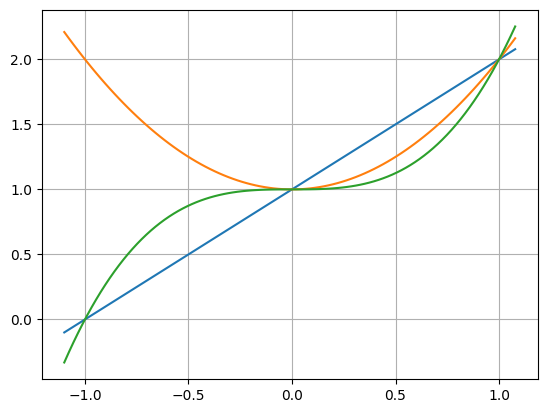

In [2]:
plot(x + 1, draw_label=False)
plot(x**2 + 1, draw_label=False)
plot(x**3 + 1, draw_label=False)

In [3]:
def interpolate(n=0, xs=[], ys=[]):
    """Return a polynomial that passes through all given points."""
    n = max(n, len(xs), len(ys))
    if len(xs) == 0: xs = [sp.symbols(f'x{i}') for i in range(n)]
    if len(ys) == 0: ys = [sp.symbols(f'y{i}') for i in range(n)]
    vs = [sp.symbols(f'a{i}') for i in range(n)]
    power = list(range(n))

    cons = [
        sum(
            v * (x_ ** k) for v, k in zip(vs, power)
        ) - y
            for x_, y in zip(xs, ys)
    ]

    sol = list(sp.linsolve(cons, vs))[0]

    f = (sum(
        v * (x ** k) for v, k in zip(sol, power)
    ))
    return f

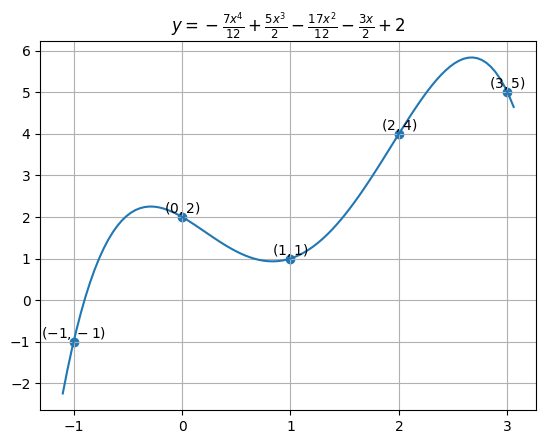

In [4]:
xs = [-1, 0, 1, 2, 3]
ys = [-1, 2, 1, 4, 5]
f = interpolate(xs=xs, ys=ys)
plot(f, list(zip(xs, ys)), True)

-32.468737101785*x**19 + 1.19175841462038e-6*x**18 + 213.314280126712*x**17 - 3.41395877967443e-6*x**16 - 710.678124683882*x**15 + 3.97502395799165e-6*x**14 + 1579.66070021798*x**13 - 2.43517003184479e-6*x**12 - 2497.36639730662*x**11 + 8.48037281286906e-7*x**10 + 2754.31533615754*x**9 - 1.68327225047449e-7*x**8 - 1983.97996997584*x**7 + 1.77140014878674e-8*x**6 + 833.325373091818*x**5 - 7.67507266075107e-10*x**4 - 166.666480422484*x**3 + 1.77978237616422e-13*x**2 + 9.99999879997547*x + 1.30794409890872e-13

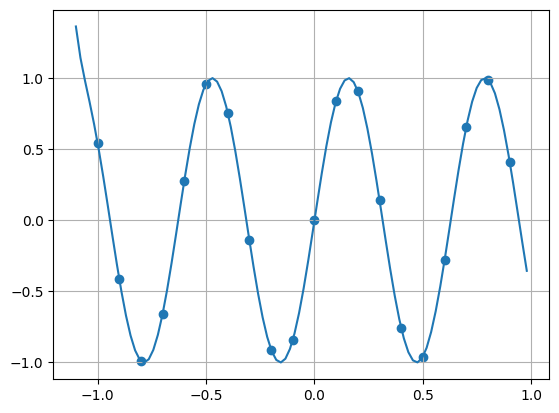

In [5]:
n = 10
xs = np.arange(-1, 1, 1 / n)
ys = np.sin(xs * n)
f = interpolate(xs=xs, ys=ys)
plot(f, list(zip(xs, ys)), draw_points=True, draw_label=False)
f

In [6]:
sp.simplify(interpolate(3))


(x**2*(-x0*y1 + x0*y2 + x1*y0 - x1*y2 - x2*y0 + x2*y1) + x*(x0**2*y1 - x0**2*y2 - x1**2*y0 + x1**2*y2 + x2**2*y0 - x2**2*y1) + x0**2*x1*y2 - x0**2*x2*y1 - x0*x1**2*y2 + x0*x2**2*y1 + x1**2*x2*y0 - x1*x2**2*y0)/(x0**2*x1 - x0**2*x2 - x0*x1**2 + x0*x2**2 + x1**2*x2 - x1*x2**2)